### Preparing the data for stage 4, first part, with new features that we have added:

In [4]:
import pandas as pd

# Load the data frames
df1 = pd.read_csv('./expedia_clean_df_features_engineering_20_06.csv')
df2 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the data frames on 'name', 'TTT', and 'LOS'
merged_df = pd.merge(df1, df2, on=['name', 'TTT', 'LOS'], suffixes=('_exp', '_book'))

# Print the column names of the merged data frame
print("Columns in merged_df:")
print(merged_df.columns)


Columns in merged_df:
Index(['Snapshot_exp', 'start_date', 'end_date', 'name', 'TTT', 'LOS',
       'score_exp', 'reviews_exp', 'price_per_night_exp', 'original_price',
       'discount_perc', 'Free_cancellation_exp', 'No_payment', 'Breakfast_exp',
       'Option Member', 'Index', 'star_rating_exp', 'location_rating_exp',
       'neighborhood_exp', 'km_from_center_exp', 'neighborhood_category_exp',
       'full_price', 'checkin_exp', 'checkout_exp', 'checkin_day_exp',
       'checkout_day_exp', 'checkin_day_name_Friday_exp',
       'checkin_day_name_Monday_exp', 'checkin_day_name_Saturday_exp',
       'checkin_day_name_Sunday_exp', 'checkin_day_name_Thursday_exp',
       'checkin_day_name_Tuesday_exp', 'checkin_day_name_Wednesday_exp',
       'checkin_day_name_nan', 'checkout_day_name_Friday_exp',
       'checkout_day_name_Monday_exp', 'checkout_day_name_Saturday_exp',
       'checkout_day_name_Sunday_exp', 'checkout_day_name_Thursday_exp',
       'checkout_day_name_Tuesday_exp', 'chec

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the data frames
df1 = pd.read_csv('./expedia_clean_df_features_engineering_20_06.csv')
df2 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the data frames on 'name', 'TTT', and 'LOS'
merged_df = pd.merge(df1, df2, on=['name', 'TTT', 'LOS'], suffixes=('_exp', '_book'))

# Select and rename the required columns
final_columns = [
    'name', 'TTT', 'LOS',
    'km_from_center_book',
    'checkin_day_name_Friday_book', 'checkin_day_name_Monday_book', 'checkin_day_name_Saturday_book',
    'checkin_day_name_Sunday_book', 'checkin_day_name_Thursday_book', 'checkin_day_name_Tuesday_book',
    'checkin_day_name_Wednesday_book', 'checkout_day_name_Friday_book', 'checkout_day_name_Monday_book',
    'checkout_day_name_Saturday_book', 'checkout_day_name_Sunday_book', 'checkout_day_name_Thursday_book',
    'checkout_day_name_Tuesday_book', 'checkout_day_name_Wednesday_book',
    'period_of_the_month_end of the month_book', 'period_of_the_month_middle of the month_book',
    'score_exp', 'score_book', 'reviews_exp', 'reviews_book', 'star_rating_exp', 'star_rating_book',
    'Free_cancellation_exp', 'Free_cancellation_book', 'Breakfast_exp', 'Breakfast_book',
    'index', 'Index', 'discount_perc',
    'full_price', 'price'
]

final_df = merged_df[final_columns].copy()

# Rename the columns
final_df.columns = [
    'name', 'TTT', 'LOS',
    'km_from_center',
    'checkin_day_name_Friday', 'checkin_day_name_Monday', 'checkin_day_name_Saturday',
    'checkin_day_name_Sunday', 'checkin_day_name_Thursday', 'checkin_day_name_Tuesday',
    'checkin_day_name_Wednesday', 'checkout_day_name_Friday', 'checkout_day_name_Monday',
    'checkout_day_name_Saturday', 'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
    'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
    'period_of_the_month_end_of_the_month', 'period_of_the_month_middle_of_the_month',
    'score_exp', 'score_book', 'reviews_exp', 'reviews_book', 'star_exp', 'star_book',
    'Free_cancellation_exp', 'Free_cancellation_book', 'Breakfast_exp', 'Breakfast_book',
    'index_book', 'index_exp', 'discount_perc_exp',
    'full_price', 'price_book'
]

# Remove rows with null values
final_df = final_df.dropna()

# Calculate the diff_price column only for rows where price_book and full_price are greater than 80
final_df = final_df[(final_df['price_book'] >= 80) & (final_df['full_price'] >= 80)]
final_df['diff_price'] = final_df['price_book'] - final_df['full_price']


# Reorder the columns to place diff_price as the last column
final_df = final_df[
    ['name', 'TTT', 'LOS', 'km_from_center', 'checkin_day_name_Friday', 'checkin_day_name_Monday',
     'checkin_day_name_Saturday', 'checkin_day_name_Sunday', 'checkin_day_name_Thursday', 
     'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday', 'checkout_day_name_Friday',
     'checkout_day_name_Monday', 'checkout_day_name_Saturday', 'checkout_day_name_Sunday',
     'checkout_day_name_Thursday', 'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
     'period_of_the_month_end_of_the_month', 'period_of_the_month_middle_of_the_month', 'score_exp',
     'score_book', 'reviews_exp', 'reviews_book', 'star_exp', 'star_book', 'Free_cancellation_exp',
     'Free_cancellation_book', 'Breakfast_exp', 'Breakfast_book', 'index_book', 'index_exp',
     'discount_perc_exp', 'diff_price']
]






# Display the first few rows of the final data frame
print(final_df.head())

# Export the final DataFrame to a CSV file
final_df.to_csv('./final_df.csv', index=False)




                                     name  TTT  LOS  km_from_center  \
0         Hotel Boutique at Grand Central    1    1             1.8   
1                      World Center Hotel    1    1             7.0   
2  Hyatt Place New York City/Times Square    1    1             1.7   
3             YOTEL New York Times Square    1    1             1.5   
4       The Westin New York Grand Central    1    1             2.1   

   checkin_day_name_Friday  checkin_day_name_Monday  \
0                      1.0                      0.0   
1                      1.0                      0.0   
2                      1.0                      0.0   
3                      1.0                      0.0   
4                      1.0                      0.0   

   checkin_day_name_Saturday  checkin_day_name_Sunday  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                        0.0                      0.0   
3             

In [11]:
final_df.columns

Index(['name', 'TTT', 'LOS', 'km_from_center', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkout_day_name_Friday', 'checkout_day_name_Monday',
       'checkout_day_name_Saturday', 'checkout_day_name_Sunday',
       'checkout_day_name_Thursday', 'checkout_day_name_Tuesday',
       'checkout_day_name_Wednesday', 'period_of_the_month_end_of_the_month',
       'period_of_the_month_middle_of_the_month', 'score_exp', 'score_book',
       'reviews_exp', 'reviews_book', 'star_exp', 'star_book',
       'Free_cancellation_exp', 'Free_cancellation_book', 'Breakfast_exp',
       'Breakfast_book', 'index_book', 'index_exp', 'discount_perc_exp',
       'diff_price'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd



X = final_df.drop(columns=['diff_price'])
y = final_df['diff_price']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the parameter grid for grid search
param_grid = {'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}

# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the cross-validation predictions for the best model
y_pred_cv = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=5)

# Define a function to print metrics
def print_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{dataset_name} Metrics")
    print(f"R² Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Squared Error (MSE): {mse}")
    print("\n")

# Print metrics for the best model on the training, test, and cross-validation sets
print_metrics(y_train, grid_search.predict(X_train), "Training (Best Model)")
print_metrics(y_test, grid_search.predict(X_test), "Test (Best Model)")
print_metrics(y_train, y_pred_cv, "Cross-Validation (Best Model)")

# Calculate and print the performance metrics for each depth in the parameter grid
for depth in param_grid['max_depth']:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    y_pred_cv = cross_val_predict(dt, X_train, y_train, cv=5)
    
    print(f"Depth: {depth}")
    print_metrics(y_train, y_pred_train, f"Training for Depth {depth}")
    print_metrics(y_test, y_pred_test, f"Test for Depth {depth}")
    print_metrics(y_train, y_pred_cv, f"Cross-Validation for Depth {depth}")


Training (Best Model) Metrics
R² Score: 0.934502419234271
Mean Absolute Error (MAE): 15.4548728367802
Root Mean Squared Error (RMSE): 26.790439192480054
Mean Squared Error (MSE): 717.7276321259714


Test (Best Model) Metrics
R² Score: 0.804914012386191
Mean Absolute Error (MAE): 27.374536619390938
Root Mean Squared Error (RMSE): 46.10048431978405
Mean Squared Error (MSE): 2125.254654518655


Cross-Validation (Best Model) Metrics
R² Score: 0.7655782604119968
Mean Absolute Error (MAE): 29.626285932250745
Root Mean Squared Error (RMSE): 50.68344726265955
Mean Squared Error (MSE): 2568.811826426792


Depth: 4
Training for Depth 4 Metrics
R² Score: 0.5993238006375881
Mean Absolute Error (MAE): 47.24811502422233
Root Mean Squared Error (RMSE): 66.26191401527669
Mean Squared Error (MSE): 4390.6412489679215


Test for Depth 4 Metrics
R² Score: 0.5797723504458027
Mean Absolute Error (MAE): 47.535107384388496
Root Mean Squared Error (RMSE): 67.66043128609367
Mean Squared Error (MSE): 4577.933961

## Conclusions from running the decision tree model:
It seems that the depth of 7,8 is the ideal depth where there is a balance between the results of the training and the test.

# Random Forest


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'max_depth': [7, 8, 9],
    'min_samples_split': [6, 7],
    'min_samples_leaf': [4, 6],
    'n_estimators': [75, 100]
}

# Initialize the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Set up the grid search with cross-validation
grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Print metrics for the best model on the training and test sets
print_metrics(y_train, grid_search_rf.predict(X_train), "Training (Best RF Model)")
print_metrics(y_test, grid_search_rf.predict(X_test), "Test (Best RF Model)")


Training (Best RF Model) Metrics
R² Score: 0.8506181746764369
Mean Absolute Error (MAE): 27.060688251264956
Root Mean Squared Error (RMSE): 40.45908760203487
Mean Squared Error (MSE): 1636.9377695891317


Test (Best RF Model) Metrics
R² Score: 0.7817129186382159
Mean Absolute Error (MAE): 31.267017361981193
Root Mean Squared Error (RMSE): 48.76480217774544
Mean Squared Error (MSE): 2378.0059314346463




Best Parameters for Random Forest: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}


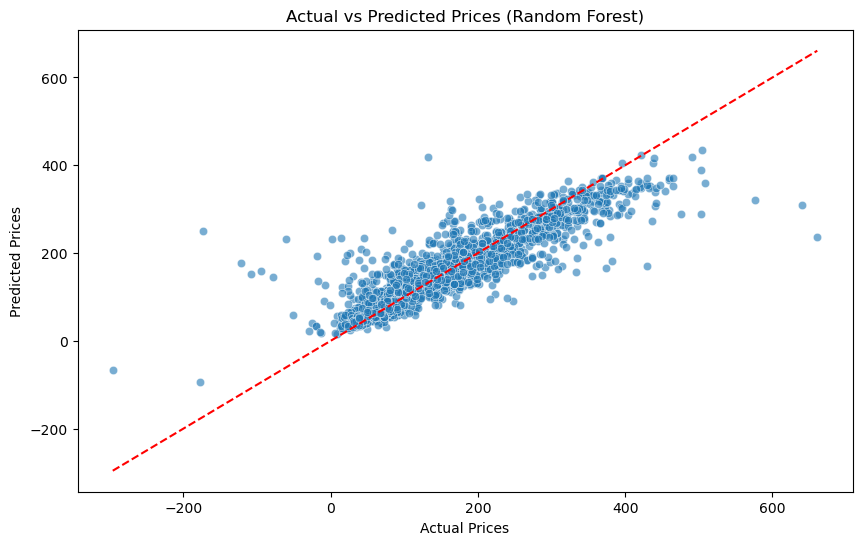

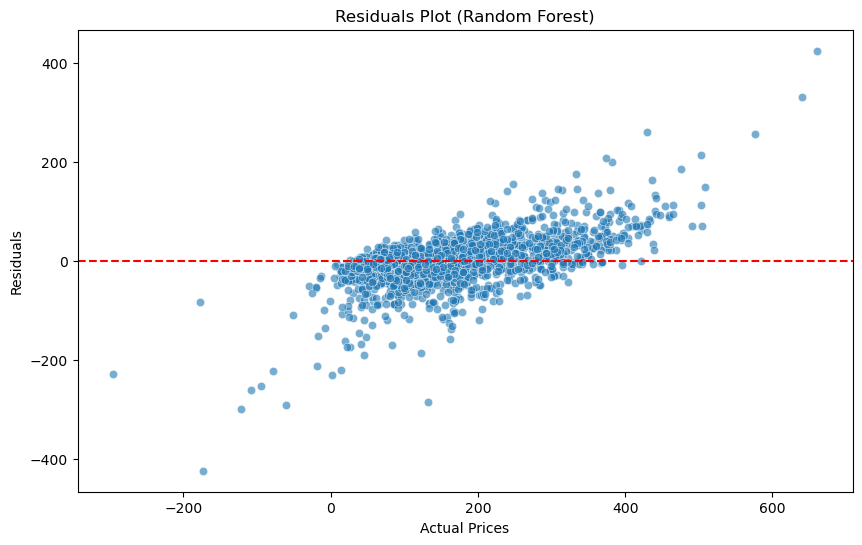

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the best parameters for the Random Forest model
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Predictions for the test set
y_test_pred_rf = grid_search_rf.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_rf = y_test - y_test_pred_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_rf, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Random Forest)')
plt.show()


## Here we changed the test group to be all lines with a TTT lower than 25 and the test group to be all lines with a TTT higher than or equal to 25

Training (Best RF Model) Set Metrics:
R²: 0.8543563094758615
MAE: 26.71022952611268
MSE: 1611.9458801769792
RMSE: 40.14904581901018

Test (Best RF Model) Set Metrics:
R²: 0.7891120866769052
MAE: 30.994907350648738
MSE: 2206.9047473758183
RMSE: 46.97770479041966

Best Parameters for Random Forest: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}


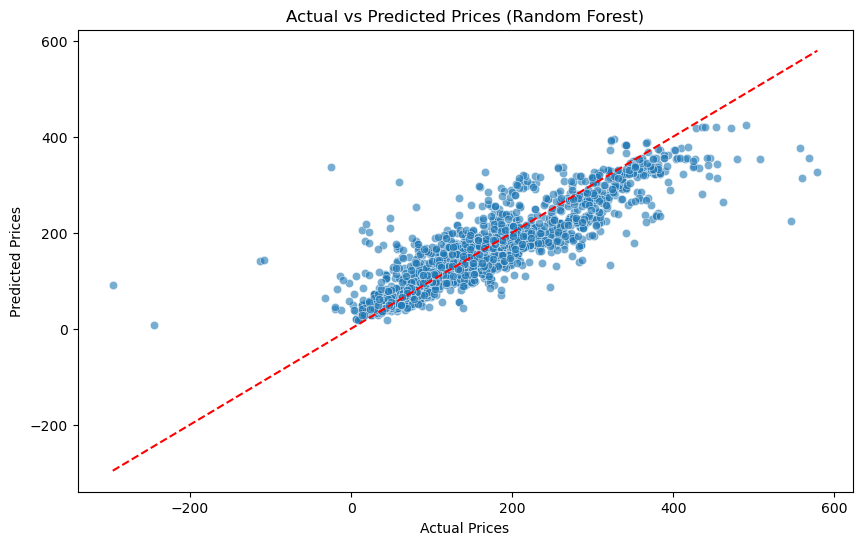

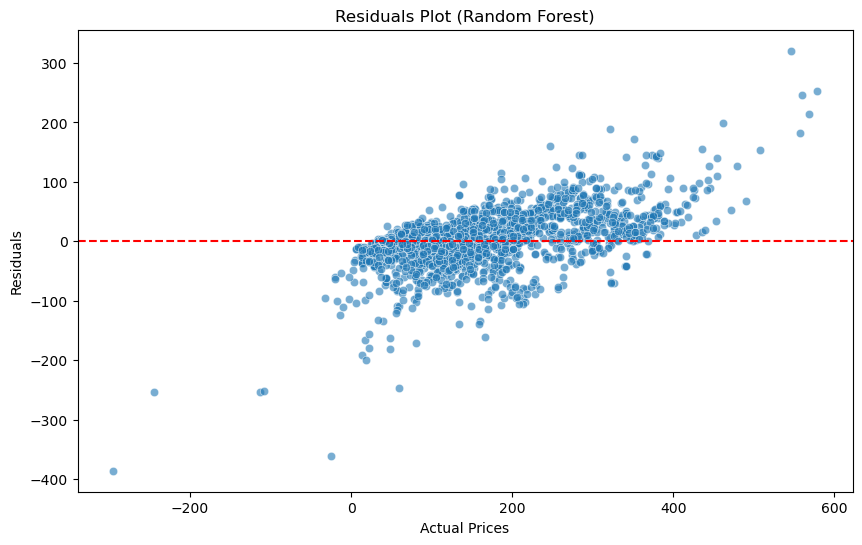

In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

final_df = pd.read_csv('./final_df.csv')

# Prepare the data for modeling
X = final_df.drop(columns=['diff_price','name'])
y = final_df['diff_price']

# One-hot encode categorical features
#X = pd.get_dummies(X)

# Filter the dataset into training and testing groups based on TTT value
train_mask = final_df['TTT'] < 25
test_mask = final_df['TTT'] >= 25

X_train = X[train_mask]
y_train = y[train_mask]
X_test = X[test_mask]
y_test = y[test_mask]

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'max_depth': [7, 8, 9],
    'min_samples_split': [6, 7],
    'min_samples_leaf': [4, 6],
    'n_estimators': [75, 100]
}

# Initialize the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Set up the grid search with cross-validation
grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Function to print metrics
def print_metrics(y_true, y_pred, dataset_type):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{dataset_type} Set Metrics:")
    print(f"R²: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}\n")

# Print metrics for the best model on the training and test sets
print_metrics(y_train, grid_search_rf.predict(X_train), "Training (Best RF Model)")
print_metrics(y_test, grid_search_rf.predict(X_test), "Test (Best RF Model)")

# Print the best parameters for the Random Forest model
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Predictions for the test set
y_test_pred_rf = grid_search_rf.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_rf = y_test - y_test_pred_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_rf, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Random Forest)')
plt.show()


In [ ]:
# KNN

Best Parameters for KNN: {'n_neighbors': 10}
Training (KNN Model) Set Metrics:
R²: 0.7903514083846431
MAE: 32.804761904761904
MSE: 2317.0410126219163
RMSE: 48.13565219898777

Test (KNN Model) Set Metrics:
R²: 0.7404271092222874
MAE: 36.309672021419004
MSE: 2776.6396084337352
RMSE: 52.69382894071881



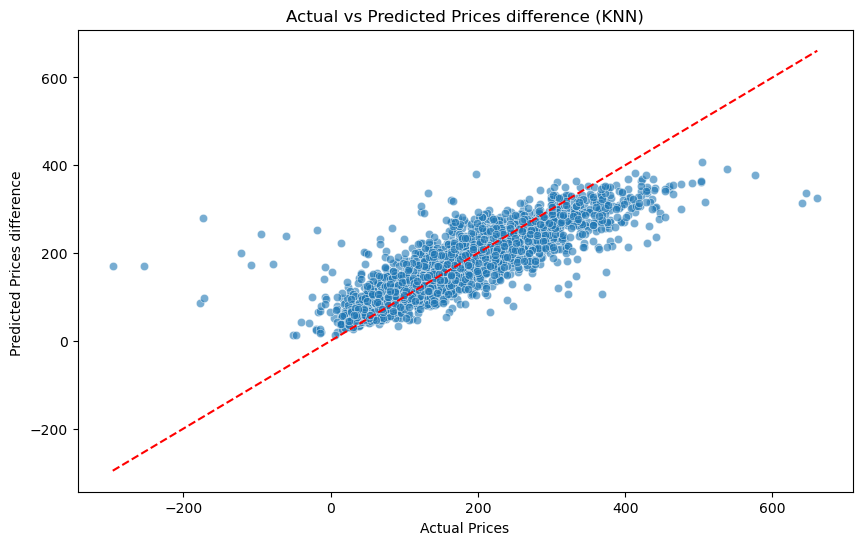

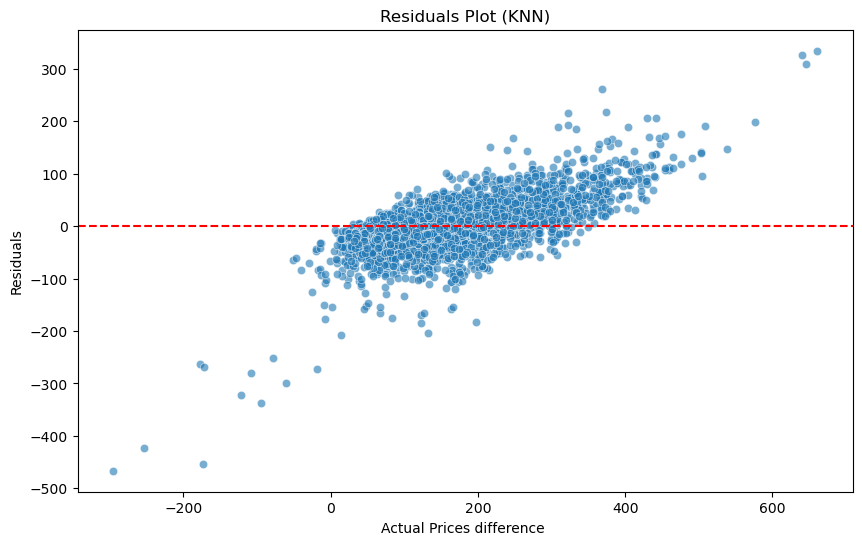

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
final_df = pd.read_csv('./final_df.csv')

# Define columns to normalize
columns_to_normalize = [
    'TTT', 'LOS', 'km_from_center', 'reviews_exp', 'reviews_book',
    'star_exp', 'star_book', 'index_book', 'index_exp', 'discount_perc_exp'
]

# Initialize the scaler
scaler = StandardScaler()

# Prepare the data for modeling
X = final_df.drop(columns=['diff_price', 'name'])
y = final_df['diff_price']

# Normalize the selected columns
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_knn = {'n_neighbors': [5, 10, 15, 20, 30, 40]}

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor()

# Set up the grid search with cross-validation
grid_search_knn = GridSearchCV(knn_regressor, param_grid_knn, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_knn.fit(X_train, y_train)

# Print the best parameters for the KNN model
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Function to print metrics
def print_metrics(y_true, y_pred, dataset_type):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{dataset_type} Set Metrics:")
    print(f"R²: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}\n")

# Predictions for the training and test sets
y_train_pred_knn = grid_search_knn.predict(X_train)
y_test_pred_knn = grid_search_knn.predict(X_test)

# Print metrics for the training and test sets
print_metrics(y_train, y_train_pred_knn, "Training (KNN Model)")
print_metrics(y_test, y_test_pred_knn, "Test (KNN Model)")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_knn, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices difference ')
plt.title('Actual vs Predicted Prices difference (KNN)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_knn = y_test - y_test_pred_knn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_knn, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices difference ')
plt.ylabel('Residuals')
plt.title('Residuals Plot (KNN)')
plt.show()


In [6]:
import warnings
warnings.filterwarnings("ignore")


# Neural Network


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Assuming final_df is already prepared as per the previous steps

# Prepare the data for modeling
X = final_df.drop(columns=['diff_price'])
y = final_df['diff_price']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Best Parameters for Neural Network: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'solver': 'sgd'}
Training (Best NN Model) Metrics
R² Score: -2.505791514284539e-07
Mean Absolute Error (MAE): 83.76887683857728
Root Mean Squared Error (RMSE): 105.12861437472183
Mean Squared Error (MSE): 11052.02556034897


Test (Best NN Model) Metrics
R² Score: -9.481483757078912e-05
Mean Absolute Error (MAE): 82.71012175691781
Root Mean Squared Error (RMSE): 103.43098919106727
Mean Squared Error (MSE): 10697.969525042674




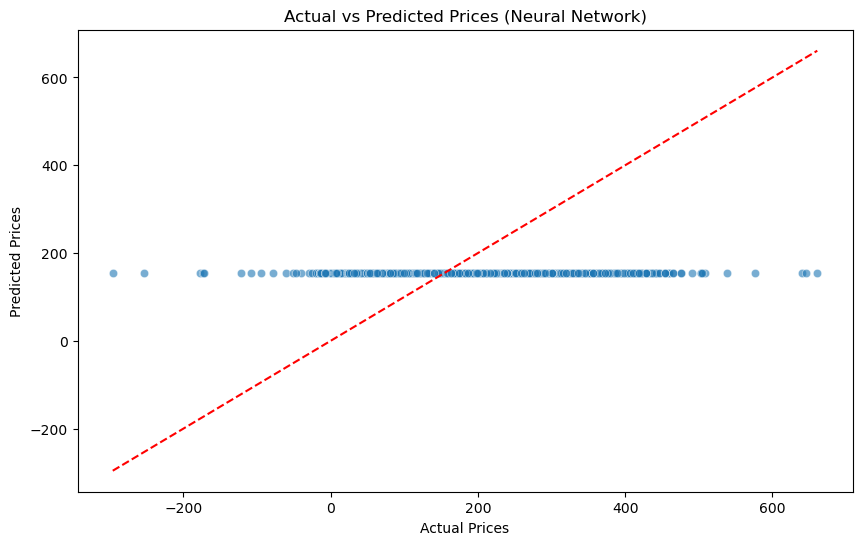

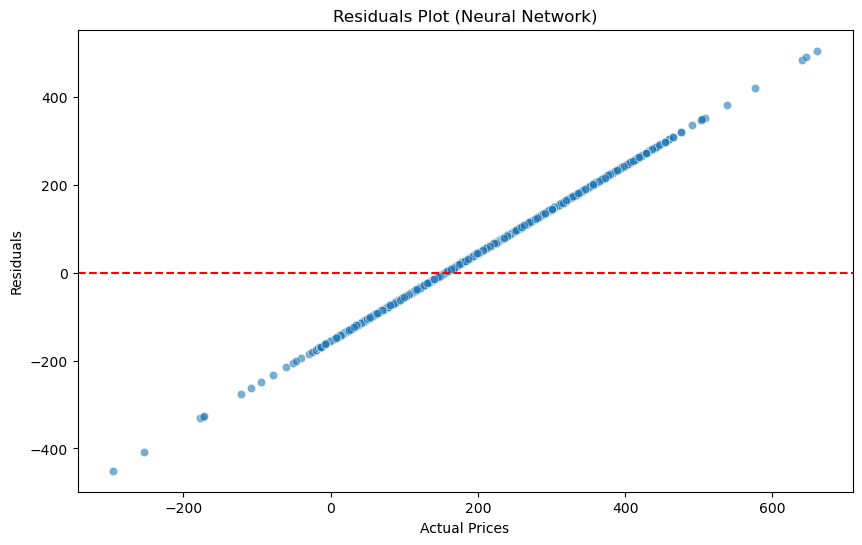

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid_nn = {
    'hidden_layer_sizes': [(5,), (10,), (5, 5), (10, 5),(15,10),(20,),(20,30)],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant']
}

# Define columns to normalize
columns_to_normalize = ['TTT', 'LOS', 'km_from_center', 'reviews_exp', 'reviews_book', 'star_exp', 'star_book', 'index_book', 'index_exp', 'discount_perc_exp', 'diff_price']

# Initialize the scaler
scaler = StandardScaler()

# Initialize the neural network regressor
nn_regressor = MLPRegressor(random_state=42, max_iter=1000)

# Set up the grid search with cross-validation
grid_search_nn = GridSearchCV(nn_regressor, param_grid_nn, cv=2, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_nn.fit(X_train, y_train)

# Print the best parameters for the Neural Network model
print("Best Parameters for Neural Network:", grid_search_nn.best_params_)

# Predictions for the test set
y_test_pred_nn = grid_search_nn.predict(X_test)
y_train_pred_nn = grid_search_nn.predict(X_train)

# Print metrics for the best model on the training and test sets
def print_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{dataset_name} Metrics")
    print(f"R² Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Squared Error (MSE): {mse}")
    print("\n")

print_metrics(y_train, y_train_pred_nn, "Training (Best NN Model)")
print_metrics(y_test, y_test_pred_nn, "Test (Best NN Model)")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_nn, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Neural Network)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_nn = y_test - y_test_pred_nn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_nn, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Neural Network)')
plt.show()


# Support Vector Machine (SVM)


Best Parameters for SVM: {'C': 10, 'kernel': 'linear'}
Training (Best SVM Model) Metrics
R² Score: 0.7828298931057729
Mean Absolute Error (MAE): 31.87513319172427
Root Mean Squared Error (RMSE): 48.991519377402575
Mean Squared Error (MSE): 2400.1689709064117


Test (Best SVM Model) Metrics
R² Score: 0.7773009350548322
Mean Absolute Error (MAE): 32.393234101832626
Root Mean Squared Error (RMSE): 48.807806157916154
Mean Squared Error (MSE): 2382.2019419487183




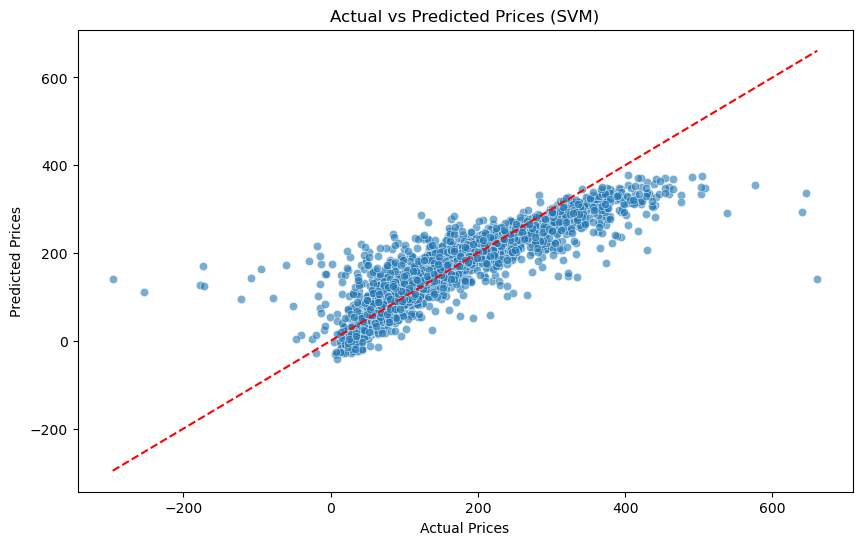

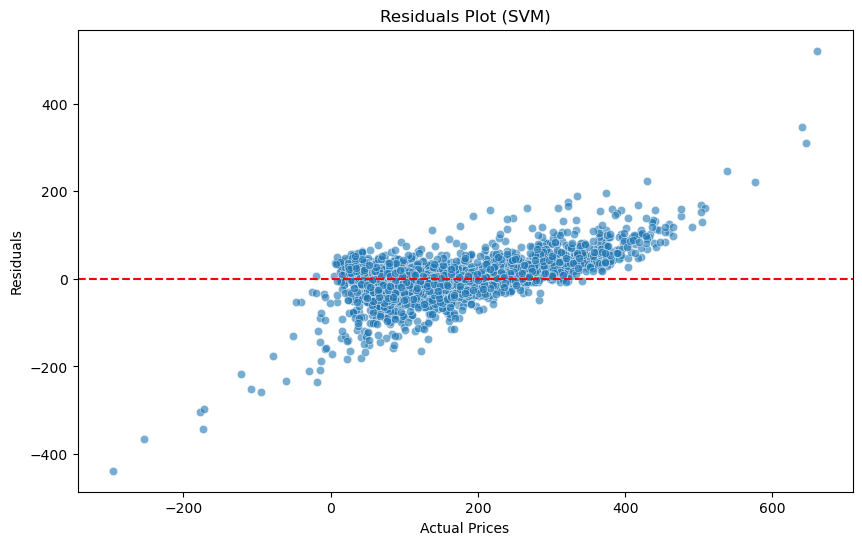

In [21]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Function to print metrics
def print_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{dataset_name} Metrics")
    print(f"R² Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Squared Error (MSE): {mse}")
    print("\n")

# Define columns to normalize
columns_to_normalize = ['TTT', 'LOS', 'km_from_center', 'reviews_exp', 'reviews_book', 'star_exp', 'star_book', 'index_book', 'index_exp', 'discount_perc_exp']

# Initialize the scaler
scaler = StandardScaler()

# Prepare the data for modeling
final_df = pd.read_csv('./final_df.csv')  
X = final_df.drop(columns=['diff_price'])
y = final_df['diff_price']

# One-hot encode categorical features
#X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the specified columns in the training and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test_scaled[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

# Define the parameter grid for GridSearchCV
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize the SVM regressor
svm_regressor = SVR()

# Set up the grid search with cross-validation
grid_search_svm = GridSearchCV(svm_regressor, param_grid_svm, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_svm.fit(X_train_scaled, y_train)

# Print the best parameters for the SVM model
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Predictions for the test set
y_test_pred_svm = grid_search_svm.predict(X_test_scaled)
y_train_pred_svm = grid_search_svm.predict(X_train_scaled)

print_metrics(y_train, y_train_pred_svm, "Training (Best SVM Model)")
print_metrics(y_test, y_test_pred_svm, "Test (Best SVM Model)")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_svm, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (SVM)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_svm = y_test - y_test_pred_svm
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_svm, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot (SVM)')
plt.show()


In [ ]:
# Linear Regression


Training (Linear Regression Model) Metrics
R² Score: 0.8116943876457072
Mean Absolute Error (MAE): 32.4536581194712
Root Mean Squared Error (RMSE): 45.61970976893675
Mean Squared Error (MSE): 2081.1579194020233


Test (Linear Regression Model) Metrics
R² Score: 0.5606972132226453
Mean Absolute Error (MAE): 34.967729025468145
Root Mean Squared Error (RMSE): 68.55072772123148
Mean Squared Error (MSE): 4699.202271110414


Cross-Validation Metrics (Linear Regression Model)
Mean R² Score: -2.3227029382025295
Mean Absolute Error (MAE): 41.241158824316585
Root Mean Squared Error (RMSE): 176.19501854288686
Mean Squared Error (MSE): 37613.36942865877




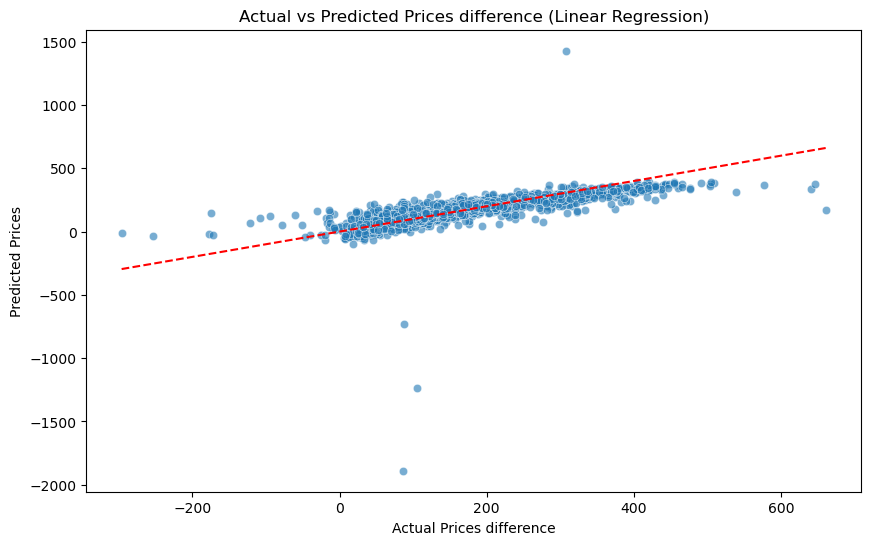

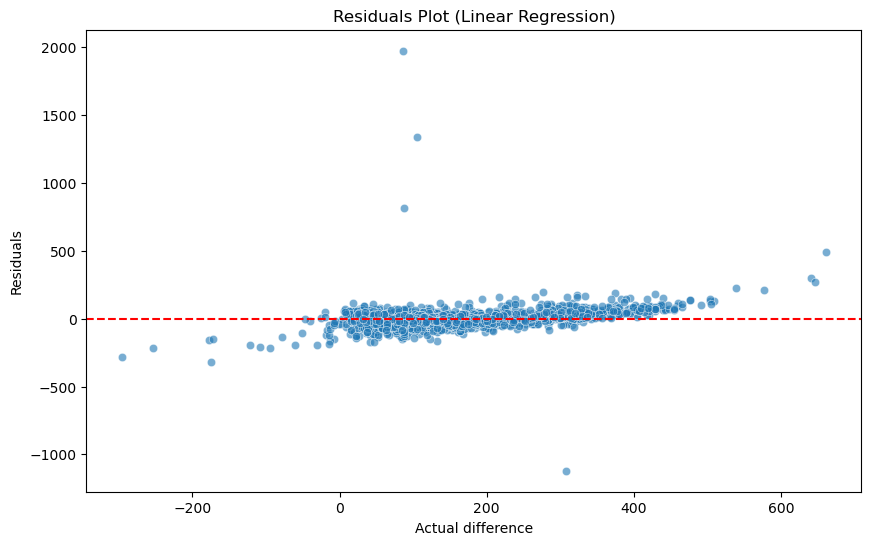

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score

# Prepare the data for modeling
final_df = pd.read_csv('./final_df.csv')  
X = final_df.drop(columns=['diff_price'])
y = final_df['diff_price']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
lr_regressor = LinearRegression()

# Fit the model to the training data
lr_regressor.fit(X_train, y_train)

# Predictions for the test set
y_test_pred_lr = lr_regressor.predict(X_test)
y_train_pred_lr = lr_regressor.predict(X_train)

print_metrics(y_train, y_train_pred_lr, "Training (Linear Regression Model)")
print_metrics(y_test, y_test_pred_lr, "Test (Linear Regression Model)")

# Cross-validation predictions
y_pred_cv_lr = cross_val_predict(lr_regressor, X_train, y_train, cv=5)

# Cross-validation metrics
cv_r2 = cross_val_score(lr_regressor, X_train, y_train, cv=5, scoring='r2')
cv_mae = -cross_val_score(lr_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mse = -cross_val_score(lr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(cv_mse)

print("Cross-Validation Metrics (Linear Regression Model)")
print(f"Mean R² Score: {cv_r2.mean()}")
print(f"Mean Absolute Error (MAE): {cv_mae.mean()}")
print(f"Root Mean Squared Error (RMSE): {cv_rmse.mean()}")
print(f"Mean Squared Error (MSE): {cv_mse.mean()}")
print("\n")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_lr, alpha=0.6)
plt.xlabel('Actual Prices difference')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices difference (Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_lr = y_test - y_test_pred_lr
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_lr, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual difference')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Linear Regression)')
plt.show()


Training (Gaussian Process Regression Model) Metrics
R² Score: 1.0
Mean Absolute Error (MAE): 5.8331897963321514e-09
Root Mean Squared Error (RMSE): 9.476769499458993e-09
Mean Squared Error (MSE): 8.980916014587626e-17


Test (Gaussian Process Regression Model) Metrics
R² Score: 0.8809166499691705
Mean Absolute Error (MAE): 20.119803620949767
Root Mean Squared Error (RMSE): 36.054616348448384
Mean Squared Error (MSE): 1299.9353600338013




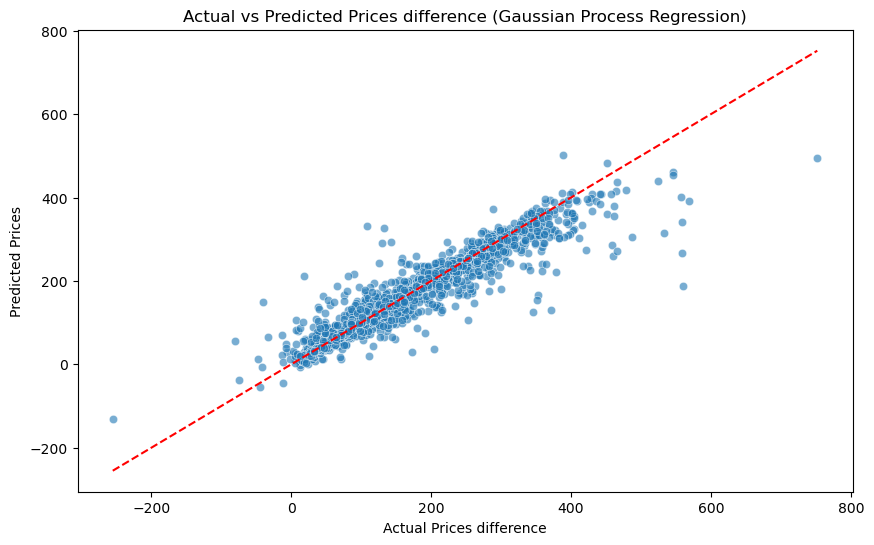

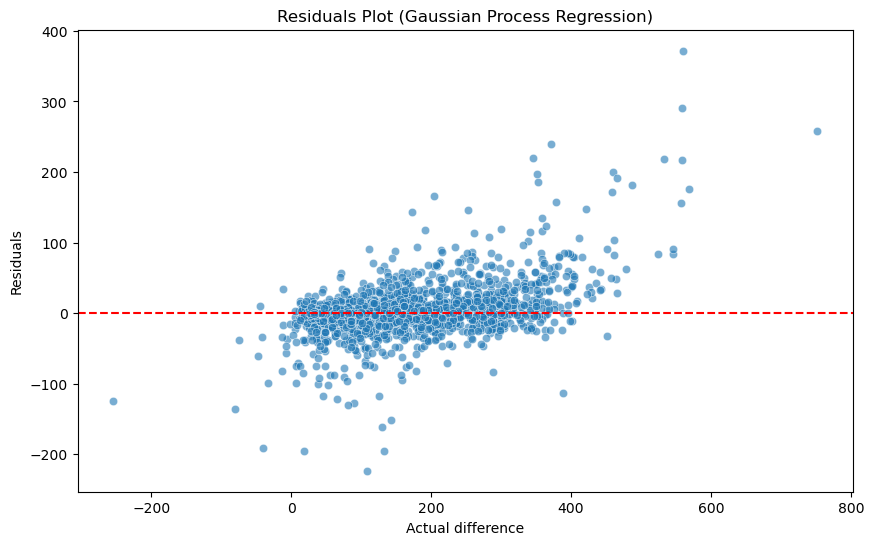

In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score

# Define columns to normalize
columns_to_normalize = ['TTT', 'LOS', 'km_from_center', 'reviews_exp', 'reviews_book', 'star_exp', 'star_book', 'index_book', 'index_exp', 'discount_perc_exp']

# Initialize the scaler
scaler = StandardScaler()

# Prepare the data for modeling
X = final_df.drop(columns=['diff_price'])
y = final_df['diff_price']

# One-hot encode categorical features
X = pd.get_dummies(X)


# Randomly select 5000 samples for training and 1000 samples for testing without overlap
np.random.seed(42)
train_indices = np.random.choice(X.index, 7000, replace=False)
remaining_indices = list(set(X.index) - set(train_indices))
test_indices = np.random.choice(remaining_indices, 2000, replace=False)

X_train = X.loc[train_indices]
y_train = y.loc[train_indices]
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the specified columns in the training and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test_scaled[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

# Initialize and fit the Gaussian Process Regressor with RBF kernel
kernel = RBF(length_scale=1.0)
gpr_regressor = GaussianProcessRegressor(kernel=kernel, random_state=42)

# Fit the model to the training data
gpr_regressor.fit(X_train_scaled, y_train)

# Predictions for the test set
y_test_pred_gpr = gpr_regressor.predict(X_test_scaled)
y_train_pred_gpr = gpr_regressor.predict(X_train_scaled)

print_metrics(y_train, y_train_pred_gpr, "Training (Gaussian Process Regression Model)")
print_metrics(y_test, y_test_pred_gpr, "Test (Gaussian Process Regression Model)")




# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_gpr, alpha=0.6)
plt.xlabel('Actual Prices difference')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices difference (Gaussian Process Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_gpr = y_test - y_test_pred_gpr
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_gpr, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual difference')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Gaussian Process Regression)')
plt.show()


Training R²: 1.0000
Training MAE: 0.0000
Training RMSE: 0.0000
Test R²: 0.8809
Test MAE: 20.1198
Test RMSE: 36.0546


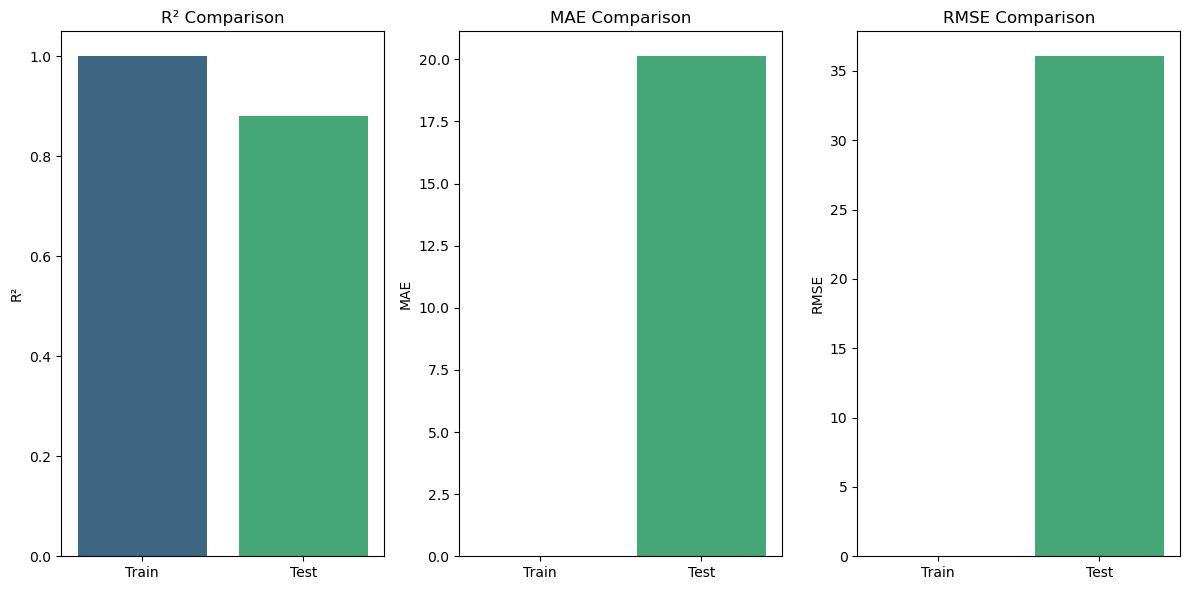

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def print_metrics(y_true, y_pred, label):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f"{label} R²: {r2:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    return r2, mae, rmse

# Compute metrics for train and test
r2_train, mae_train, rmse_train = print_metrics(y_train, y_train_pred_gpr, "Training")
r2_test, mae_test, rmse_test = print_metrics(y_test, y_test_pred_gpr, "Test")

# Plot metrics
metrics = {
    'R²': [r2_train, r2_test],
    'MAE': [mae_train, mae_test],
    'RMSE': [rmse_train, rmse_test]
}

df_metrics = pd.DataFrame(metrics, index=['Train', 'Test'])

plt.figure(figsize=(12, 6))

# Plot R², MAE, and RMSE
for i, metric in enumerate(metrics.keys()):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=df_metrics.index, y=df_metrics[metric], palette='viridis')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')

plt.tight_layout()
plt.show()


### Preparing the data for stage 4, first part, without the new features we added:

In [2]:
import pandas as pd

# Load the data frames
df1 = pd.read_csv('./expedia_clean_df_features_engineering_20_06.csv')
df2 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the data frames on 'name', 'TTT', and 'LOS'
merged_df = pd.merge(df1, df2, on=['name', 'TTT', 'LOS'], suffixes=('_exp', '_book'))

# Select and rename the required columns
final_columns = [
    'name', 'TTT', 'LOS',
    'km_from_center_book',
    'score_exp', 'score_book', 'reviews_exp', 'reviews_book', 'star_rating_exp', 'star_rating_book',
    'Free_cancellation_exp', 'Free_cancellation_book', 'Breakfast_exp', 'Breakfast_book',
    'index', 'Index', 'discount_perc',
    'full_price', 'price'
]

final_df_no_new_features = merged_df[final_columns].copy()

# Rename the columns
final_df_no_new_features.columns = [
    'name', 'TTT', 'LOS',
    'km_from_center',
    'score_exp', 'score_book', 'reviews_exp', 'reviews_book', 'star_exp', 'star_book',
    'Free_cancellation_exp', 'Free_cancellation_book', 'Breakfast_exp', 'Breakfast_book',
    'index_book', 'index_exp', 'discount_perc_exp',
    'full_price', 'price_book'
]

# Remove rows with null values
final_df_no_new_features = final_df_no_new_features.dropna()

# Calculate the diff_price column only for rows where price_book and full_price are greater than 80
final_df_no_new_features = final_df_no_new_features[(final_df_no_new_features['price_book'] >= 80) & (final_df_no_new_features['full_price'] >= 80)]
final_df_no_new_features['diff_price'] = final_df_no_new_features['price_book'] - final_df_no_new_features['full_price']

# Select only the specified columns for the new unified file
selected_columns = [
    'name', 'TTT', 'LOS', 'km_from_center', 'score_book', 'reviews_exp', 'reviews_book', 'star_exp', 
    'star_book', 'Free_cancellation_exp', 'Free_cancellation_book', 'Breakfast_exp', 'Breakfast_book', 
    'index_book', 'index_exp', 'discount_perc_exp', 'diff_price', 'score_exp'
]

final_df_no_new_features = final_df_no_new_features[selected_columns]

# Display the first few rows of the final data frame
print(final_df_no_new_features.head())

# Export the final DataFrame to a CSV file
final_df_no_new_features.to_csv('./final_df_no_new_features.csv', index=False)


                                     name  TTT  LOS  km_from_center  \
0         Hotel Boutique at Grand Central    1    1             1.8   
1                      World Center Hotel    1    1             7.0   
2  Hyatt Place New York City/Times Square    1    1             1.7   
3             YOTEL New York Times Square    1    1             1.5   
4       The Westin New York Grand Central    1    1             2.1   

   score_book  reviews_exp  reviews_book  star_exp  star_book  \
0         7.8         1052        1820.0       4.0        4.0   
1         8.2         2020        3735.0       4.0        4.0   
2         7.6         1491       21687.0       4.0        4.0   
3         7.3         2323        6096.0       4.0        4.0   
4         8.2         2553         841.0       4.0        4.0   

   Free_cancellation_exp  Free_cancellation_book  Breakfast_exp  \
0                      1                       0              0   
1                      1                       0

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Assuming final_df is already prepared as per the previous steps

# Prepare the data for modeling
X = final_df_no_new_features.drop(columns=['diff_price'])
y = final_df_no_new_features['diff_price']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the parameter grid for grid search
param_grid = {'max_depth': [4, 5, 6, 7, 8, 9, 10]}

# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the cross-validation predictions for the best model
y_pred_cv = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=5)

# Define a function to print metrics
def print_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{dataset_name} Metrics")
    print(f"R² Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Squared Error (MSE): {mse}")
    print("\n")

# Print metrics for the best model on the training, test, and cross-validation sets
print_metrics(y_train, grid_search.predict(X_train), "Training (Best Model)")
print_metrics(y_test, grid_search.predict(X_test), "Test (Best Model)")
print_metrics(y_train, y_pred_cv, "Cross-Validation (Best Model)")

# Calculate and print the performance metrics for each depth in the parameter grid
for depth in param_grid['max_depth']:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    y_pred_cv = cross_val_predict(dt, X_train, y_train, cv=5)
    
    print(f"Depth: {depth}")
    print_metrics(y_train, y_pred_train, f"Training for Depth {depth}")
    print_metrics(y_test, y_pred_test, f"Test for Depth {depth}")
    print_metrics(y_train, y_pred_cv, f"Cross-Validation for Depth {depth}")


Training (Best Model) Metrics
R² Score: 0.8518195255155054
Mean Absolute Error (MAE): 25.800967268322434
Root Mean Squared Error (RMSE): 40.29607019026501
Mean Squared Error (MSE): 1623.7732727787647


Test (Best Model) Metrics
R² Score: 0.7645855308983983
Mean Absolute Error (MAE): 32.39422268963991
Root Mean Squared Error (RMSE): 50.641787405689996
Mean Squared Error (MSE): 2564.590631643102


Cross-Validation (Best Model) Metrics
R² Score: 0.7509016366399722
Mean Absolute Error (MAE): 33.786437400082946
Root Mean Squared Error (RMSE): 52.24595124940775
Mean Squared Error (MSE): 2729.6394219554913


Depth: 4
Training for Depth 4 Metrics
R² Score: 0.5993238006375881
Mean Absolute Error (MAE): 47.24811502422233
Root Mean Squared Error (RMSE): 66.26191401527669
Mean Squared Error (MSE): 4390.6412489679215


Test for Depth 4 Metrics
R² Score: 0.5797723504458027
Mean Absolute Error (MAE): 47.535107384388496
Root Mean Squared Error (RMSE): 67.66043128609367
Mean Squared Error (MSE): 4577.9

## Random forest 

Training (Best RF Model) Set Metrics:
R²: 0.8609742403456158
MAE: 25.706428849779122
MSE: 1523.4551889505194
RMSE: 39.03146408925137

Test (Best RF Model) Set Metrics:
R²: 0.788729324565781
MAE: 30.270399921250558
MSE: 2301.5696402486847
RMSE: 47.97467707289633

Best Parameters for Random Forest: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 75}
Test Set Metrics:
R²: 0.788729324565781
MAE: 30.270399921250558
MSE: 2301.5696402486847
RMSE: 47.97467707289633

Training Set Metrics:
R²: 0.8609742403456158
MAE: 25.706428849779122
MSE: 1523.4551889505194
RMSE: 39.03146408925137



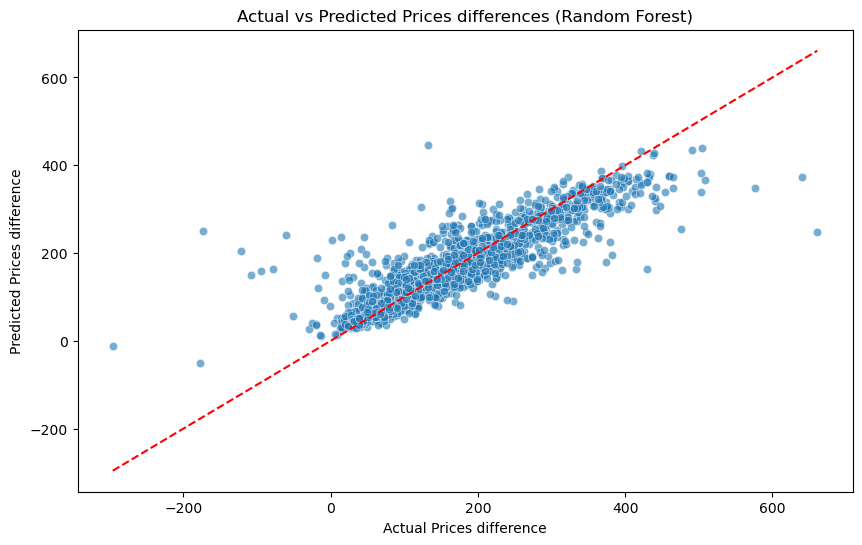

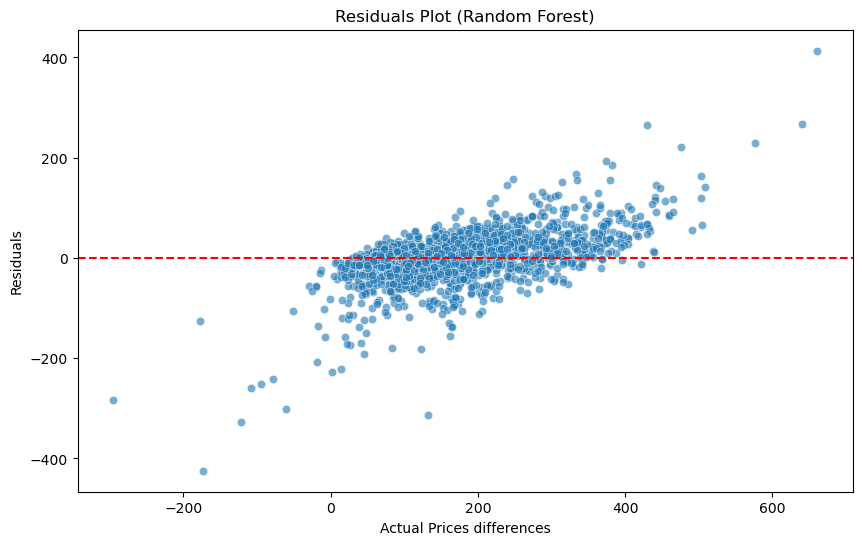

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Prepare the data for modeling
numeric_columns = [
    'TTT', 'LOS', 'km_from_center', 'score_book', 'reviews_exp', 'reviews_book', 
    'star_exp', 'star_book', 'Free_cancellation_exp', 'Free_cancellation_book', 
    'Breakfast_exp', 'Breakfast_book', 'index_book', 'index_exp', 
    'discount_perc_exp', 'diff_price', 'score_exp'
]

# Filter the DataFrame to keep only the numeric columns
final_df_numeric = final_df_no_new_features[numeric_columns]

# Separate features and target variable
X = final_df_numeric.drop(columns=['diff_price'])
y = final_df_numeric['diff_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'max_depth': [7, 8, 9],
    'min_samples_split': [6],
    'min_samples_leaf': [4],
    'n_estimators': [75, 100]
}

# Initialize the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Set up the grid search with cross-validation
grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Print metrics for the best model on the training and test sets
def print_metrics(y_true, y_pred, dataset_type):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{dataset_type} Set Metrics:")
    print(f"R²: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}\n")

print_metrics(y_train, grid_search_rf.predict(X_train), "Training (Best RF Model)")
print_metrics(y_test, grid_search_rf.predict(X_test), "Test (Best RF Model)")

# Print the best parameters for the Random Forest model
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Predictions for the test set
y_test_pred_rf = grid_search_rf.predict(X_test)
y_train_pred_rf = grid_search_rf.predict(X_train)

# Error measures for the test set
r2_test = r2_score(y_test, y_test_pred_rf)
mae_test = mean_absolute_error(y_test, y_test_pred_rf)
mse_test = mean_squared_error(y_test, y_test_pred_rf)
rmse_test = np.sqrt(mse_test)

# Error measures for the training set
r2_train = r2_score(y_train, y_train_pred_rf)
mae_train = mean_absolute_error(y_train, y_train_pred_rf)
mse_train = mean_squared_error(y_train, y_train_pred_rf)
rmse_train = np.sqrt(mse_train)

print("Test Set Metrics:")
print(f"R²: {r2_test}")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}\n")

print("Training Set Metrics:")
print(f"R²: {r2_train}")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}\n")

# Plot actual vs predicted prices for the test set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.6)
plt.xlabel('Actual Prices difference')
plt.ylabel('Predicted Prices difference')
plt.title('Actual vs Predicted Prices differences (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot for the test set
residuals_rf = y_test - y_test_pred_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_rf, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices differences')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Random Forest)')
plt.show()


In [ ]:
# Neural Network


Best Parameters for Neural Network: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (20, 30), 'learning_rate': 'constant', 'solver': 'sgd'}
Training (Best NN Model) Metrics
R² Score: -0.0006651827640491437
Mean Absolute Error (MAE): 83.07558990751757
Root Mean Squared Error (RMSE): 104.71565132834405
Mean Squared Error (MSE): 10965.367633119322


Test (Best NN Model) Metrics
R² Score: -8.329430808595717e-05
Mean Absolute Error (MAE): 82.96276168087034
Root Mean Squared Error (RMSE): 104.37837614684616
Mean Squared Error (MSE): 10894.845407052504




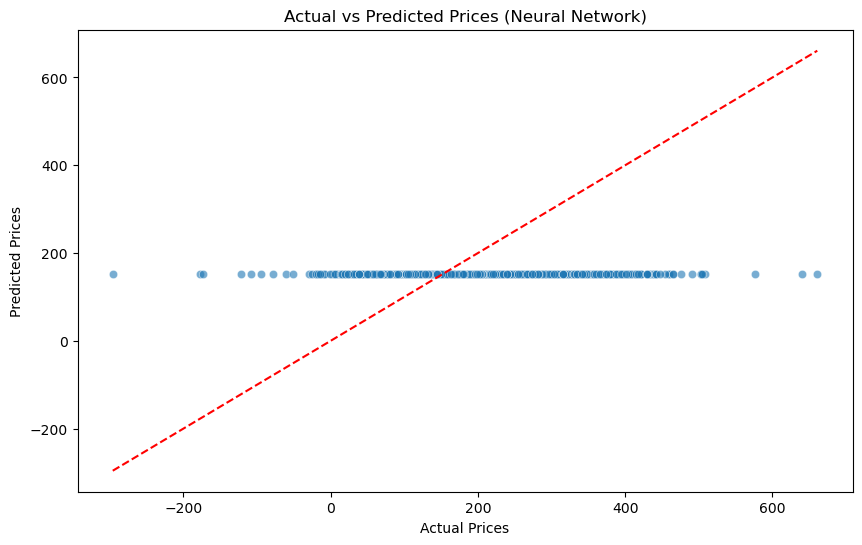

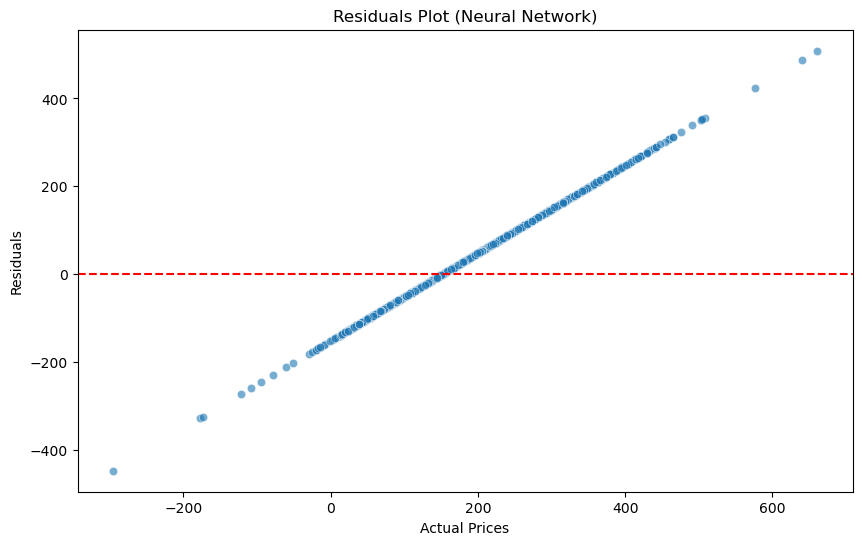

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV


# Assuming final_df is already prepared as per the previous steps

# Prepare the data for modeling
numeric_columns = [
    'TTT', 'LOS', 'km_from_center', 'score_book', 'reviews_exp', 'reviews_book', 
    'star_exp', 'star_book', 'Free_cancellation_exp', 'Free_cancellation_book', 
    'Breakfast_exp', 'Breakfast_book', 'index_book', 'index_exp', 
    'discount_perc_exp', 'diff_price', 'score_exp'
]

# Filter the DataFrame to keep only the numeric columns
final_df_numeric = final_df_no_new_features[numeric_columns]

# Separate features and target variable
X = final_df_numeric.drop(columns=['diff_price'])
y = final_df_numeric['diff_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the parameter grid for GridSearchCV
param_grid_nn = {
    'hidden_layer_sizes': [(5,), (10,), (5, 5), (10, 5),(15,10),(20,),(20,30)],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant']
}

# Define columns to normalize
#columns_to_normalize = ['TTT', 'LOS', 'km_from_center', 'reviews_exp', 'reviews_book', 'star_exp', 'star_book', 'index_book', 'index_exp', 'discount_perc_exp', 'diff_price']

# Initialize the scaler
scaler = StandardScaler()

# Initialize the neural network regressor
nn_regressor = MLPRegressor(random_state=42, max_iter=1000)

# Set up the grid search with cross-validation
grid_search_nn = GridSearchCV(nn_regressor, param_grid_nn, cv=2, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_nn.fit(X_train, y_train)

# Print the best parameters for the Neural Network model
print("Best Parameters for Neural Network:", grid_search_nn.best_params_)

# Predictions for the test set
y_test_pred_nn = grid_search_nn.predict(X_test)
y_train_pred_nn = grid_search_nn.predict(X_train)

# Print metrics for the best model on the training and test sets
def print_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{dataset_name} Metrics")
    print(f"R² Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Squared Error (MSE): {mse}")
    print("\n")

print_metrics(y_train, y_train_pred_nn, "Training (Best NN Model)")
print_metrics(y_test, y_test_pred_nn, "Test (Best NN Model)")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_nn, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Neural Network)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_nn = y_test - y_test_pred_nn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_nn, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Neural Network)')
plt.show()


Training (Linear Regression Model) Set Metrics:
R²: 0.6114325623039074
MAE: 47.6882269766019
MSE: 4257.95248799169
RMSE: 65.25298834529872

Test (Linear Regression Model) Set Metrics:
R²: 0.6032252722329254
MAE: 47.231286850647805
MSE: 4322.439285858062
RMSE: 65.7452605581426

Cross-Validation Metrics (Linear Regression Model)
Mean R² Score: 0.6098049419460183
Mean Absolute Error (MAE): 47.840745096978864
Root Mean Squared Error (RMSE): 65.35859440254873
Mean Squared Error (MSE): 4276.44554328421




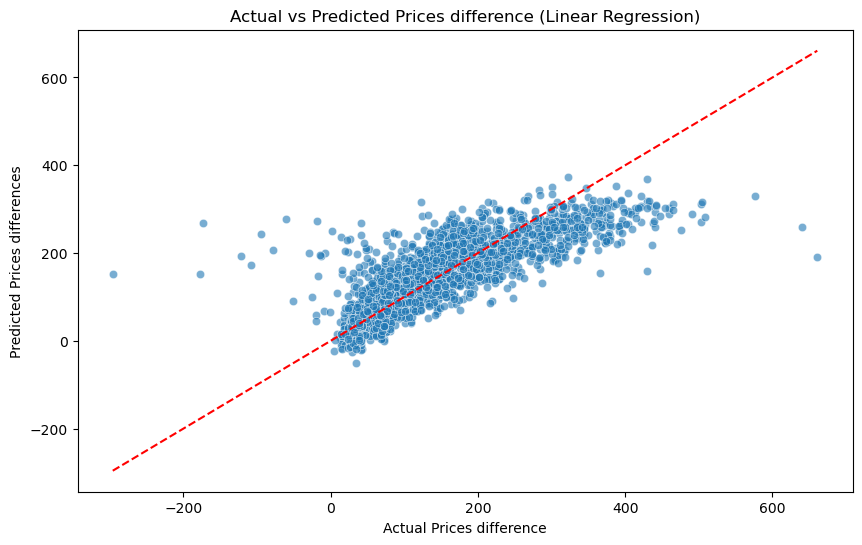

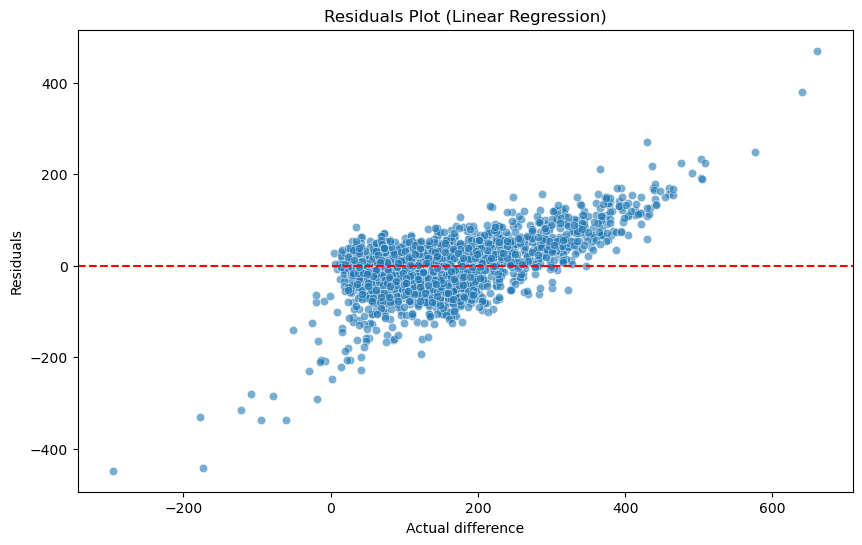

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data
final_df_no_new_features = pd.read_csv('./final_df_no_new_features.csv')

# Define numeric columns
numeric_columns = [
    'TTT', 'LOS', 'km_from_center', 'score_book', 'reviews_exp', 'reviews_book', 
    'star_exp', 'star_book', 'Free_cancellation_exp', 'Free_cancellation_book', 
    'Breakfast_exp', 'Breakfast_book', 'index_book', 'index_exp', 
    'discount_perc_exp', 'diff_price', 'score_exp'
]

# Define columns to normalize
columns_to_normalize = ['TTT', 'LOS', 'km_from_center', 'reviews_exp', 'reviews_book',
                        'star_exp', 'star_book', 'index_book', 'index_exp', 'discount_perc_exp'
                       ,'score_exp','score_book']

# Filter the DataFrame to keep only the numeric columns
final_df_numeric = final_df_no_new_features[numeric_columns]

# Separate features and target variable
X = final_df_numeric.drop(columns=['diff_price'])
y = final_df_numeric['diff_price']

# Normalize specified columns
scaler = StandardScaler()
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr_regressor = LinearRegression()

# Fit the model to the training data
lr_regressor.fit(X_train, y_train)

# Predictions for the test set
y_test_pred_lr = lr_regressor.predict(X_test)
y_train_pred_lr = lr_regressor.predict(X_train)

# Function to print metrics
def print_metrics(y_true, y_pred, dataset_type):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{dataset_type} Set Metrics:")
    print(f"R²: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}\n")

print_metrics(y_train, y_train_pred_lr, "Training (Linear Regression Model)")
print_metrics(y_test, y_test_pred_lr, "Test (Linear Regression Model)")

# Cross-validation predictions
y_pred_cv_lr = cross_val_predict(lr_regressor, X_train, y_train, cv=5)

# Cross-validation metrics
cv_r2 = cross_val_score(lr_regressor, X_train, y_train, cv=5, scoring='r2')
cv_mae = -cross_val_score(lr_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mse = -cross_val_score(lr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(cv_mse)

print("Cross-Validation Metrics (Linear Regression Model)")
print(f"Mean R² Score: {cv_r2.mean()}")
print(f"Mean Absolute Error (MAE): {cv_mae.mean()}")
print(f"Root Mean Squared Error (RMSE): {cv_rmse.mean()}")
print(f"Mean Squared Error (MSE): {cv_mse.mean()}")
print("\n")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_lr, alpha=0.6)
plt.xlabel('Actual Prices difference')
plt.ylabel('Predicted Prices differences')
plt.title('Actual vs Predicted Prices difference (Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_lr = y_test - y_test_pred_lr
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_lr, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual difference')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Linear Regression)')
plt.show()


Feature Importances (Linear Regression):
                   Feature   Coefficient
1                      LOS  7.142305e+01
12              index_book  3.011985e+01
8    Free_cancellation_exp -2.620192e+01
9   Free_cancellation_book  2.374143e+01
11          Breakfast_book -1.771854e+01
14       discount_perc_exp  1.381611e+01
3               score_book -1.113690e+01
13               index_exp -1.059637e+01
0                      TTT -7.623575e+00
4              reviews_exp -6.824773e+00
2           km_from_center -4.007620e+00
6                 star_exp  2.069612e+00
7                star_book  2.069612e+00
15               score_exp -1.714104e+00
5             reviews_book  8.321761e-01
10           Breakfast_exp  1.065814e-14


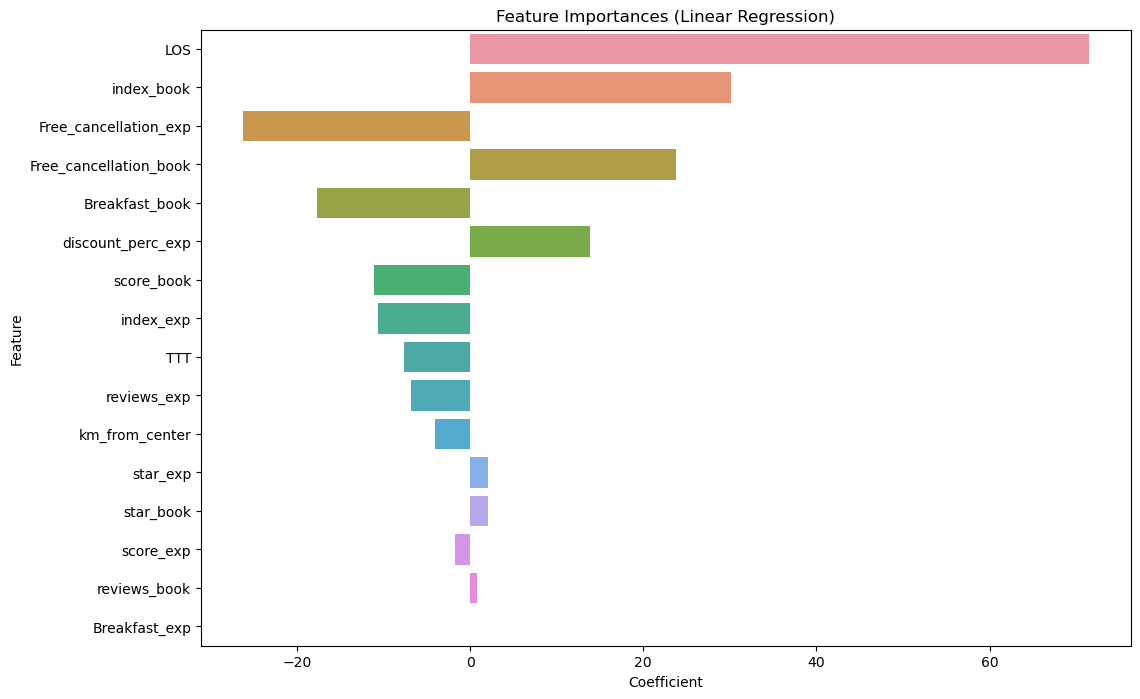

In [29]:
# Calculate and display feature importances (coefficients) for the linear regression model
coefficients = lr_regressor.coef_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by absolute value of coefficients
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the feature importances
print("Feature Importances (Linear Regression):")
print(importance_df[['Feature', 'Coefficient']])

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title('Feature Importances (Linear Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Training (SVM Model) Set Metrics:
R²: 0.754291749883588
MAE: 31.11565526959148
MSE: 2692.4902948803665
RMSE: 51.88921173886116

Test (SVM Model) Set Metrics:
R²: 0.7287847718093938
MAE: 32.74334065842837
MSE: 2954.601881655721
RMSE: 54.35624970190384

Cross-Validation Metrics (SVM Model)
Mean R² Score: 0.7330296368072782
Mean Absolute Error (MAE): 33.46716922965189
Root Mean Squared Error (RMSE): 54.0509648424989
Mean Squared Error (MSE): 2926.8303218179076




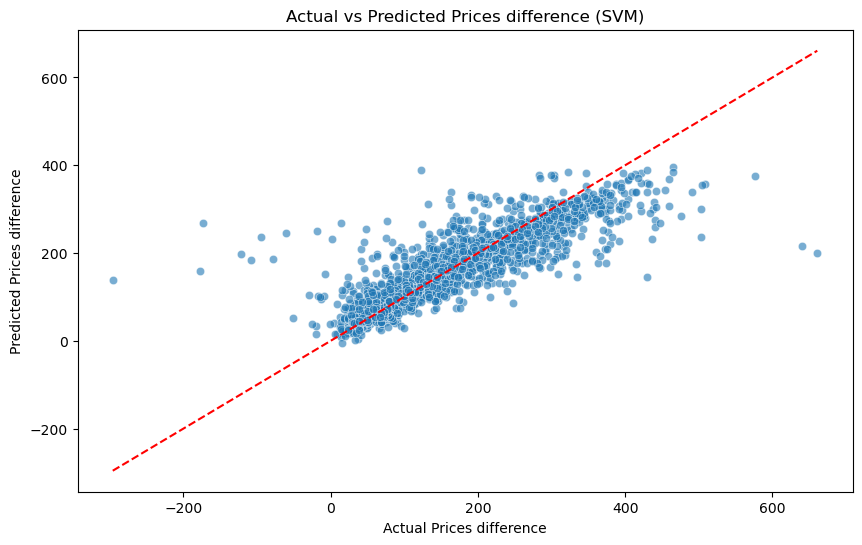

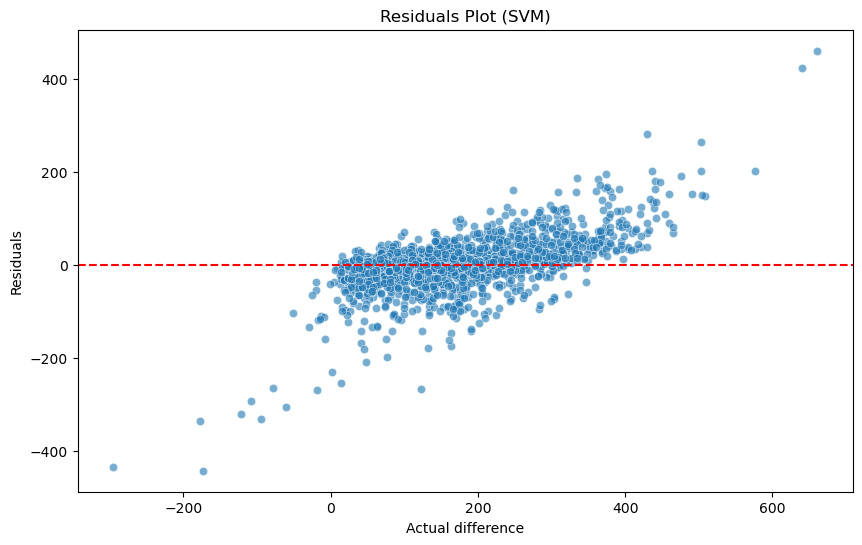

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

# Load the data
final_df_no_new_features = pd.read_csv('./final_df_no_new_features.csv')

# Define numeric columns
numeric_columns = [
    'TTT', 'LOS', 'km_from_center', 'score_book', 'reviews_exp', 'reviews_book', 
    'star_exp', 'star_book', 'Free_cancellation_exp', 'Free_cancellation_book', 
    'Breakfast_exp', 'Breakfast_book', 'index_book', 'index_exp', 
    'discount_perc_exp', 'diff_price', 'score_exp'
]

# Define columns to normalize
columns_to_normalize = ['TTT', 'LOS', 'km_from_center', 'reviews_exp', 'reviews_book',
                        'score_book','score_exp','star_exp', 'star_book', 'index_book', 'index_exp', 'discount_perc_exp']

# Filter the DataFrame to keep only the numeric columns
final_df_numeric = final_df_no_new_features[numeric_columns]

# Separate features and target variable
X = final_df_numeric.drop(columns=['diff_price'])
y = final_df_numeric['diff_price']

# Normalize specified columns
scaler = StandardScaler()
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize the SVM regressor
svm_regressor = SVR()

# Set up the grid search with cross-validation
grid_search_svm = GridSearchCV(svm_regressor, param_grid_svm, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_svm.fit(X_train, y_train)

# Print the best parameters for the SVM model
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Predictions for the test set
y_test_pred_svm = grid_search_svm.predict(X_test)
y_train_pred_svm = grid_search_svm.predict(X_train)

# Function to print metrics
def print_metrics(y_true, y_pred, dataset_type):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{dataset_type} Set Metrics:")
    print(f"R²: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}\n")

print_metrics(y_train, y_train_pred_svm, "Training (SVM Model)")
print_metrics(y_test, y_test_pred_svm, "Test (SVM Model)")

# Cross-validation predictions
y_pred_cv_svm = cross_val_predict(grid_search_svm.best_estimator_, X_train, y_train, cv=5)

# Cross-validation metrics
cv_r2 = cross_val_score(grid_search_svm.best_estimator_, X_train, y_train, cv=5, scoring='r2')
cv_mae = -cross_val_score(grid_search_svm.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mse = -cross_val_score(grid_search_svm.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(cv_mse)

print("Cross-Validation Metrics (SVM Model)")
print(f"Mean R² Score: {cv_r2.mean()}")
print(f"Mean Absolute Error (MAE): {cv_mae.mean()}")
print(f"Root Mean Squared Error (RMSE): {cv_rmse.mean()}")
print(f"Mean Squared Error (MSE): {cv_mse.mean()}")
print("\n")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_svm, alpha=0.6)
plt.xlabel('Actual Prices difference')
plt.ylabel('Predicted Prices difference')
plt.title('Actual vs Predicted Prices difference (SVM)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_svm = y_test - y_test_pred_svm
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_svm, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual difference')
plt.ylabel('Residuals')
plt.title('Residuals Plot (SVM)')
plt.show()


C:\Users\ronro\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Training (Gaussian Process Regression Model) Set Metrics:
R²: 1.0
MAE: 1.550902888450675e-08
MSE: 3.4633792310433436e-16
RMSE: 1.8610156450291717e-08

Test (Gaussian Process Regression Model) Set Metrics:
R²: -2.2298942428667887
MAE: 156.706
MSE: 35258.109
RMSE: 187.77142753890965



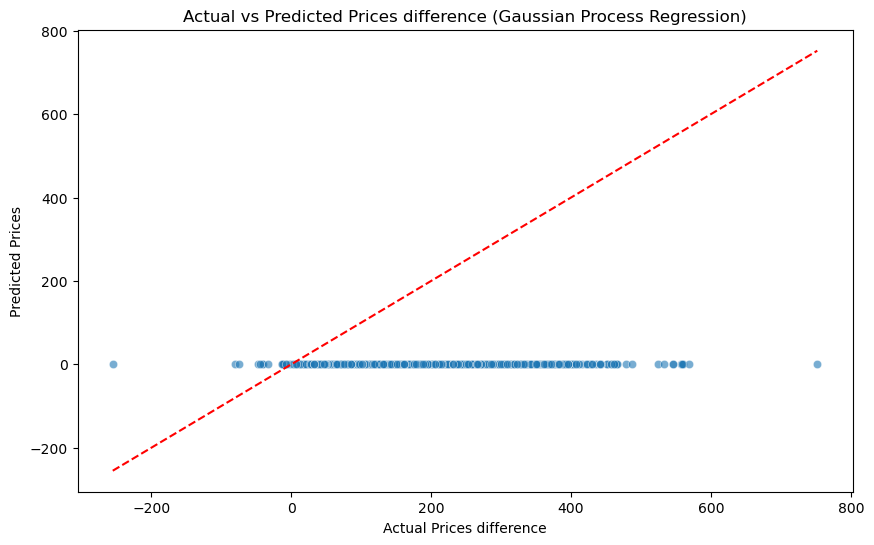

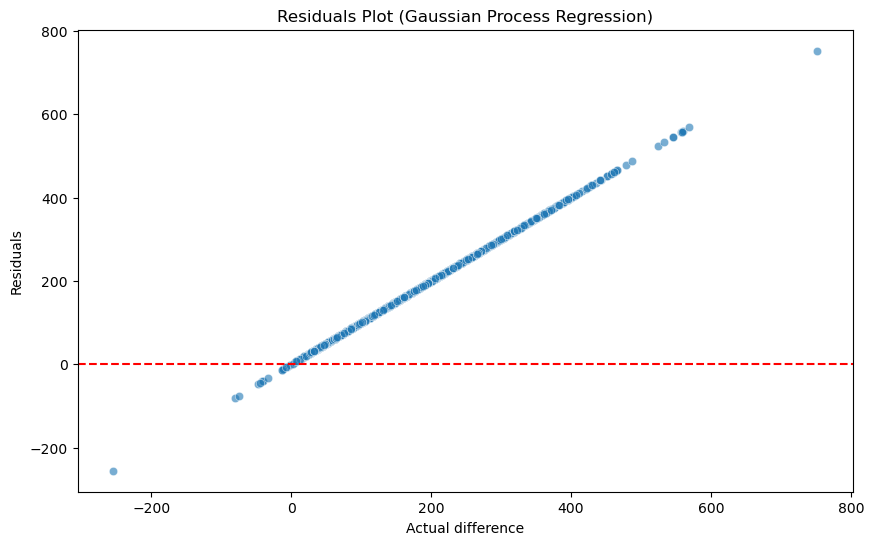

In [21]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score

# Load the data
final_df_no_new_features = pd.read_csv('./final_df_no_new_features.csv')

# Define columns to normalize
columns_to_normalize = ['TTT', 'LOS', 'km_from_center', 'reviews_exp', 'reviews_book', 'star_exp', 'star_book', 'index_book', 'index_exp', 'discount_perc_exp']

# Initialize the scaler
scaler = StandardScaler()


# Prepare the data for modeling
X = final_df_no_new_features.drop(columns=['diff_price','name'])
y = final_df_no_new_features['diff_price']

# One-hot encode categorical features
X = pd.get_dummies(X)


# Randomly select 5000 samples for training and 1000 samples for testing without overlap
np.random.seed(42)
train_indices = np.random.choice(X.index, 7000, replace=False)
remaining_indices = list(set(X.index) - set(train_indices))
test_indices = np.random.choice(remaining_indices, 2000, replace=False)

X_train = X.loc[train_indices]
y_train = y.loc[train_indices]
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the specified columns in the training and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test_scaled[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

# Initialize and fit the Gaussian Process Regressor with RBF kernel
kernel = RBF(length_scale=1.0)
gpr_regressor = GaussianProcessRegressor(kernel=kernel, random_state=42)

# Fit the model to the training data
gpr_regressor.fit(X_train_scaled, y_train)

# Predictions for the test set
y_test_pred_gpr = gpr_regressor.predict(X_test_scaled)
y_train_pred_gpr = gpr_regressor.predict(X_train_scaled)

print_metrics(y_train, y_train_pred_gpr, "Training (Gaussian Process Regression Model)")
print_metrics(y_test, y_test_pred_gpr, "Test (Gaussian Process Regression Model)")




# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_gpr, alpha=0.6)
plt.xlabel('Actual Prices difference')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices difference (Gaussian Process Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_gpr = y_test - y_test_pred_gpr
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_gpr, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual difference')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Gaussian Process Regression)')
plt.show()


In [20]:
final_df_no_new_features.columns

Index(['name', 'TTT', 'LOS', 'km_from_center', 'score_book', 'reviews_exp',
       'reviews_book', 'star_exp', 'star_book', 'Free_cancellation_exp',
       'Free_cancellation_book', 'Breakfast_exp', 'Breakfast_book',
       'index_book', 'index_exp', 'discount_perc_exp', 'diff_price',
       'score_exp'],
      dtype='object')

Best Parameters for KNN: {'n_neighbors': 5}
Training (KNN Model) Set Metrics:
R²: 0.8937859882376559
MAE: 21.43339070567986
MSE: 1173.8796787148597
RMSE: 34.26192753939655

Test (KNN Model) Set Metrics:
R²: 0.8158010182560997
MAE: 28.136680053547522
MSE: 1970.3682730923692
RMSE: 44.38883049926377



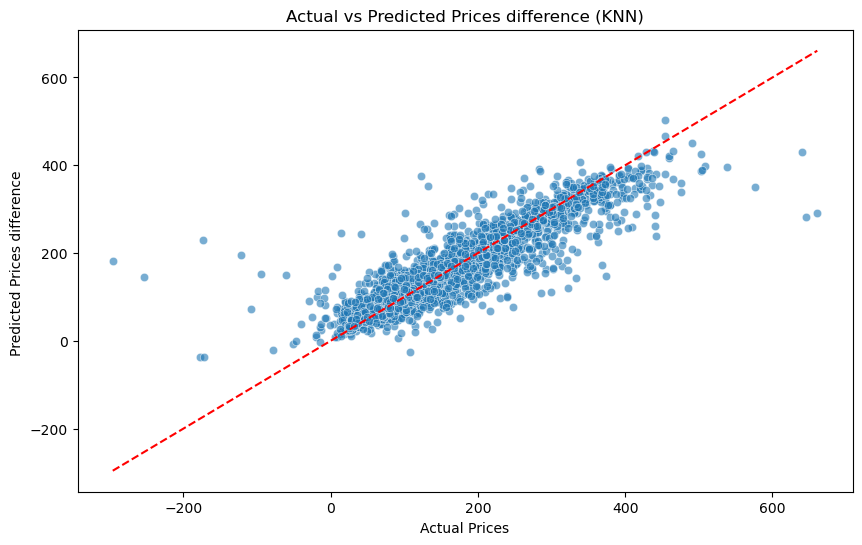

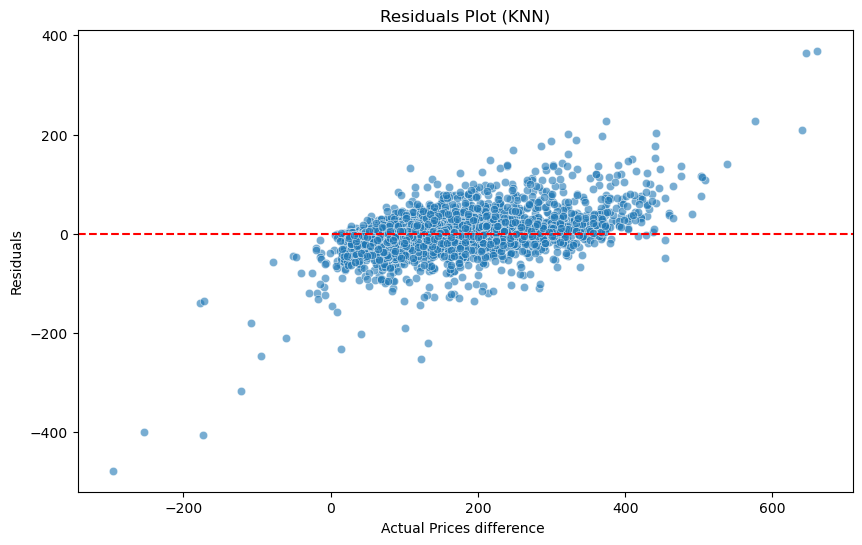

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
final_df_no_new_features = pd.read_csv('./final_df_no_new_features.csv')

# Define columns to normalize
columns_to_normalize = [
    'TTT', 'LOS', 'km_from_center', 'reviews_exp', 'reviews_book',
    'star_exp', 'star_book', 'index_book', 'index_exp', 'discount_perc_exp'
]

# Initialize the scaler
scaler = StandardScaler()

# Prepare the data for modeling
X = final_df_no_new_features.drop(columns=['diff_price', 'name'])
y = final_df_no_new_features['diff_price']

# Normalize the selected columns
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_knn = {'n_neighbors': [5, 10, 15, 20, 30, 40]}

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor()

# Set up the grid search with cross-validation
grid_search_knn = GridSearchCV(knn_regressor, param_grid_knn, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_knn.fit(X_train, y_train)

# Print the best parameters for the KNN model
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Function to print metrics
def print_metrics(y_true, y_pred, dataset_type):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{dataset_type} Set Metrics:")
    print(f"R²: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}\n")

# Predictions for the training and test sets
y_train_pred_knn = grid_search_knn.predict(X_train)
y_test_pred_knn = grid_search_knn.predict(X_test)

# Print metrics for the training and test sets
print_metrics(y_train, y_train_pred_knn, "Training (KNN Model)")
print_metrics(y_test, y_test_pred_knn, "Test (KNN Model)")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_knn, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices difference ')
plt.title('Actual vs Predicted Prices difference (KNN)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_knn = y_test - y_test_pred_knn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_knn, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices difference ')
plt.ylabel('Residuals')
plt.title('Residuals Plot (KNN)')
plt.show()


Feature Importances:
                   Feature  Importance
1                      LOS    0.922954
12              index_book    0.170809
14       discount_perc_exp    0.144554
2           km_from_center    0.141723
13               index_exp    0.128031
4              reviews_exp    0.065965
0                      TTT    0.051939
3               score_book    0.037987
5             reviews_book    0.026568
9   Free_cancellation_book    0.024780
11          Breakfast_book    0.014587
6                 star_exp    0.010863
7                star_book    0.010863
15               score_exp    0.004445
8    Free_cancellation_exp    0.001482
10           Breakfast_exp    0.000000


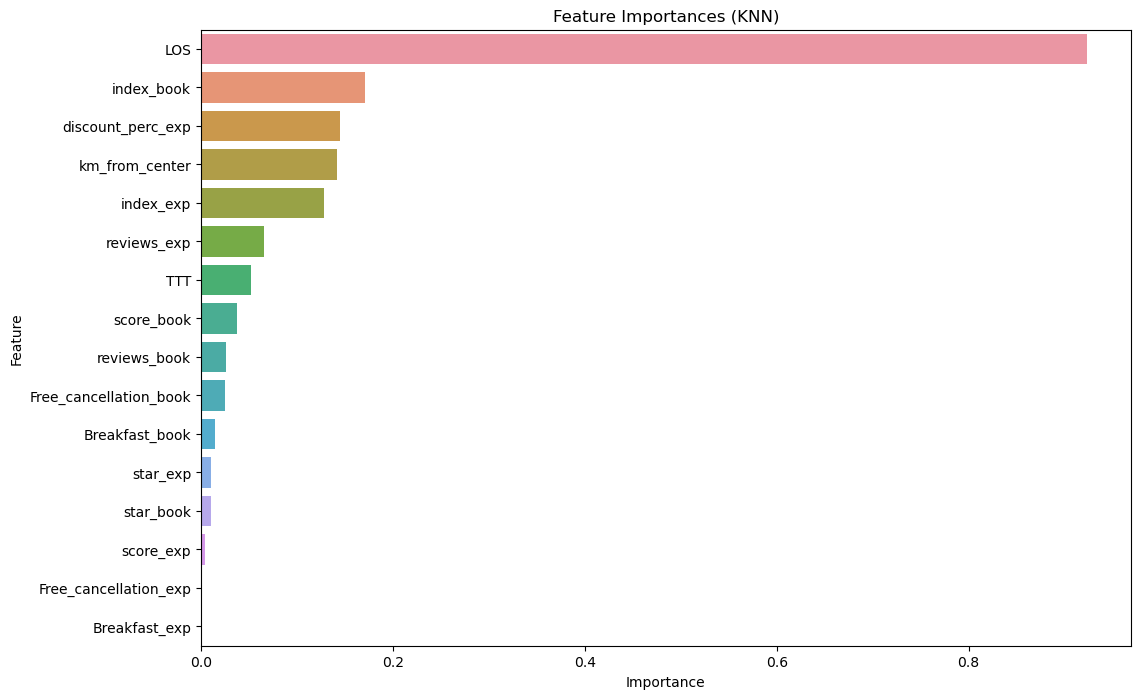

In [27]:
from sklearn.inspection import permutation_importance

# Calculate feature importances using permutation importance
perm_importance = permutation_importance(grid_search_knn.best_estimator_, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (KNN)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
